In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import os
import struct
import nltk
#nltk.download() 
from nltk.tag import pos_tag # pos_tag shows the characteristic of a word 
                             # using information in the database

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics.pairwise import cosine_similarity

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Install Empath tool for analyzing text across lexical categories
import sys
!{sys.executable} -m pip install empath

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
from empath import Empath

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to D:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#######################################################################################

In [6]:
df = pd.read_csv("./data/Combined_News_DJIA.csv", header = 0, index_col = 0)

In [7]:
df.tail()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,Weapons shipped into Jordan by the CIA and Sau...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,UK's Osborne: 'Absolutely' going to have to cu...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2016-07-01,1,A 117-year-old woman 

In [8]:
df.shape

(1989, 26)

In [9]:
headlines = df.as_matrix(columns = df.columns[1:])

In [10]:
headlines.shape

(1989L, 25L)

In [11]:
headlines[0][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for daily in headlines:
    for line in daily:
        pol_score = sia.polarity_scores(str(line))
        pol_score['headline'] = str(line)
        results.append(pol_score)

C:\ProgramData\Anaconda2\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
sentiment_score_df = pd.DataFrame.from_records(results)

In [14]:
sentiment_score_df.head()

,compound,headline,neg,neu,pos
0,-0.5994,"b""Georgia 'downs two Russian warplanes' as cou...",0.262,0.738,0.0
1,0.0000,b'BREAKING: Musharraf to be impeached.',0.000,1.000,0.0
2,-0.3612,b'Russia Today: Columns of troops roll into So...,0.172,0.828,0.0
3,-0.7089,b'Russian tanks are moving towards the capital...,0.247,0.753,0.0
4,-0.9260,"b""Afghan children raped with 'impunity,' U.N. ...",0.424,0.576,0.0


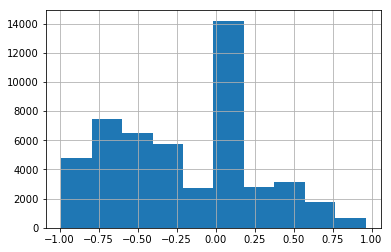

In [15]:
sentiment_score_df['compound'].hist()

In [16]:
daily_avg_sentiment_score = np.mean(sentiment_score_df['compound'].values.reshape(-1, 25), axis = 1)

In [17]:
len(daily_avg_sentiment_score)

1989

(array([  11.,   39.,  187.,  353.,  553.,  482.,  263.,   82.,   15.,    4.]),
 array([-0.520204 , -0.4549512, -0.3896984, -0.3244456, -0.2591928,
        -0.19394  , -0.1286872, -0.0634344,  0.0018184,  0.0670712,
         0.132324 ]),
 <a list of 10 Patch objects>)

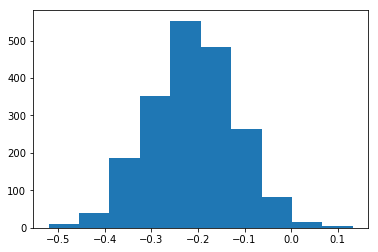

In [18]:
plt.hist(daily_avg_sentiment_score)

In [19]:
df.Label.value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [20]:
daily_avg_sentiment_score = pd.DataFrame(daily_avg_sentiment_score, index=df.index, columns=["daily sentiment score"])

In [21]:
daily_avg_sentiment_score.head()

,daily sentiment score
Date,
2008-08-08,-0.309440
2008-08-11,-0.120740
2008-08-12,-0.217556
2008-08-13,-0.168724
2008-08-14,-0.130748


In [22]:
daily_avg_sentiment_score['label'] = 0
daily_avg_sentiment_score.loc[daily_avg_sentiment_score["daily sentiment score"] > 0.2, 'label'] = 1
daily_avg_sentiment_score.loc[daily_avg_sentiment_score["daily sentiment score"] < -0.2, 'label'] = -1
daily_avg_sentiment_score.head()

,daily sentiment score,label
Date,,
2008-08-08,-0.309440,-1
2008-08-11,-0.120740,0
2008-08-12,-0.217556,-1
2008-08-13,-0.168724,0
2008-08-14,-0.130748,0


In [23]:
daily_avg_sentiment_score.label.value_counts()

-1    1086
 0     903
Name: label, dtype: int64

In [24]:
np.sum(df.Label.values == (daily_avg_sentiment_score.label.values + 1))

1009

In [25]:
np.sum(df.Label != (daily_avg_sentiment_score.label.values + 1))

980

In [26]:
##############################################################################################

In [27]:
from empath import Empath

In [28]:
lexicon = Empath()

In [29]:
categories = lexicon.analyze("he hit the other person", normalize=True)

In [30]:
lexicon.analyze("he hit the other person", categories=['economics', 'technology', 'politics'], normalize=True)

{'economics': 0.0, 'politics': 0.0, 'technology': 0.0}

In [31]:
'economics' in categories.keys()

True

In [32]:
'technology' in categories.keys()

True

In [33]:
'politics' in categories.keys()

True

In [34]:
'finance' in categories.keys()

False

In [35]:
'market' in categories.keys()

False

In [36]:
topic_results = []

for daily in headlines:
    for line in daily:
        topic_score = lexicon.analyze(str(line), categories=['economics', 'technology', 'politics'], normalize=True)
        topic_score['headline'] = str(line)
        topic_results.append(topic_score)

In [37]:
topic_score_df = pd.DataFrame.from_records(topic_results)

In [38]:
np.sum(topic_score_df.economics != 0.)

3512

In [60]:
df.iloc[0][19]

"b'This is a busy day:  The European Union has approved new sanctions against Iran in protest at its nuclear programme.'"

In [80]:
len(headlines)

1989

In [65]:
filtered_topic_score_df = topic_score_df.loc[topic_score_df[['economics', 'technology', 'politics']].any( axis = 1)]
fdf = filtered_topic_score_df
fdf.iloc[0][1]

"b'This is a busy day:  The European Union has approved new sanctions against Iran in protest at its nuclear programme.'"

In [96]:
headlinesf = [0]*len(headlines)
for i in range(len(headlines)):
    headlinesf[i] = []
    for j in range(25):
        if (df.iloc[i][j+1] in fdf.values):
            headlinesf[i].append(df.iloc[i][j+1])
headlinesf[0]

["b'This is a busy day:  The European Union has approved new sanctions against Iran in protest at its nuclear programme.'"]

In [190]:
headlines2 = headlinesf

## Tokenization
### Basic Settings

In [191]:
# Remove some minor problems in form.
def small_clean(text):
    text = text.replace('b\'', '')
    text = text.replace('b"', '')
    text = text.replace('*', '')
    text = text.replace('\\','')
    text = text.replace('\'','')
    return text

In [192]:
# Single words that we think may be meaningful.
good_pos_tag_set = set(['JJ','JJR','JJS', # adjective
                        'NN','NNP','NNS','NNPS', # noun
                        'RB','RBR','RBS','RP', # adverb and particle
                        'VB','VBD','VBG','VBN','VBP','VBZ']) # verb

In [193]:
# The following two functions are used to help extract terminology and meaningful words
# REFERENCE: http://bdewilde.github.io/blog/2014/09/23/intro-to-automatic-keyphrase-extraction/
def extract_candidate_chunks(text, grammar=r'KT: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}'):
    import itertools, nltk, string

    # exclude candidates that are stop words or entirely punctuation
    punct = set(string.punctuation)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # tokenize, POS-tag, and chunk using regular expressions
    chunker = nltk.chunk.regexp.RegexpParser(grammar)
    tagged_sents = nltk.pos_tag_sents(nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(text))
    all_chunks = list(itertools.chain.from_iterable(nltk.chunk.tree2conlltags(chunker.parse(tagged_sent))
                                                    for tagged_sent in tagged_sents))
    # join constituent chunk words into a single chunked phrase
    candidates = [' '.join(word for word, pos, chunk in group).lower()
                  for key, group in itertools.groupby(all_chunks, lambda (word,pos,chunk): chunk != 'O') if key]

    return [cand for cand in candidates
            if cand not in stop_words and not all(char in punct for char in cand)]

def extract_candidate_words(text, good_tags=good_pos_tag_set):
    import itertools, nltk, string

    # exclude candidates that are stop words or entirely punctuation
    punct = set(string.punctuation)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # tokenize and POS-tag words
    tagged_words = itertools.chain.from_iterable(nltk.pos_tag_sents(nltk.word_tokenize(sent)
                                                                    for sent in nltk.sent_tokenize(text)))
    # filter on certain POS tags and lowercase all words
    candidates = [word.lower() for word, tag in tagged_words
                  if tag in good_tags and word.lower() not in stop_words
                  and not all(char in punct for char in word)]

    return candidates

# Pack the word extraction process. Return the list of terms and good words
def tokenize_pack(text):
    text = small_clean(text)
    wordlist = extract_candidate_words(text, good_tags=good_pos_tag_set)
    termlist = extract_candidate_chunks(text, grammar=r'KT: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}')
    finallist = wordlist + termlist
    return finallist

### Vocabulary Construction

In [194]:
# In this part we construct a vocabulary which contains two types of
# terms: (1) Single words among verbs, nouns, adjectives, adverbs and
# particles, which we believe contain meaningful information. 
# (2) Phases that contains more than one words and refers to a specific
# meaning, for example: "Australian government"
headlines2 =[' '.join(map(str, headline)) for headline in headlines2]
for i in range(len(headlines2)):
    headlines2[i] = small_clean(headlines2[i])

In [195]:
headlines2[4]

'The US and Poland have agreed a preliminary deal on plans for the controversial US defence shield Russia apparently is sabotaging infrastructure to cripple the already battered Georgian military. War in the Caucasus is as much the product of an American imperial drive as local conflicts.'

In [196]:
headlines2_train = headlines2[:1500]
headlines2_test = headlines2[1500:]
DJIA_train = df.Label[:1500].values
DJIA_test = df.Label[1500:].values

In [197]:
# TfidfVectorizer
# Exclude the extremely high frequency words/phases and extremely low frequency words/phases.
tfidfvectorizer_word_candidate = TfidfVectorizer(min_df=0.001, max_df=0.2, max_features = 200000, ngram_range = (1, 1))
tfidfvectorizer_phase_candidate = TfidfVectorizer(min_df=0.001, max_df=0.2, max_features = 200000, ngram_range = (2, 5))
train_word_document_matrix_tfidf = tfidfvectorizer_word_candidate.fit_transform(headlines2_train)
test_word_document_matrix_tfidf = tfidfvectorizer_word_candidate.transform(headlines2_test)
train_phase_document_matrix_tfidf = tfidfvectorizer_phase_candidate.fit_transform(headlines2_train)
test_phase_document_matrix_tfidf = tfidfvectorizer_phase_candidate.transform(headlines2_test)
print train_word_document_matrix_tfidf.shape
print test_word_document_matrix_tfidf.shape
print train_phase_document_matrix_tfidf.shape
print test_phase_document_matrix_tfidf.shape

(1500, 8353)
(489, 8353)
(1500, 22855)
(489, 22855)


In [198]:
word_candidate_list = tfidfvectorizer_word_candidate.get_feature_names()
word_final_list = []
for i in range(len(word_candidate_list)):
    posTag = pos_tag([str(word_candidate_list[i])])[0][1]
    isGood = (good_pos_tag_set.union([posTag])==good_pos_tag_set)
    if isGood:
        word_final_list.append(str(word_candidate_list[i]))
print len(word_candidate_list)
print len(word_final_list)

8353
8048


In [199]:
phase_candidate_list = tfidfvectorizer_phase_candidate.get_feature_names()
phase_final_list = []
phase_all_text = ""
for i in range(len(phase_candidate_list)):
    phase_all_text = phase_all_text + ", " + str(phase_candidate_list[i])
    
phase_final_list = extract_candidate_chunks(phase_all_text, grammar=r'KT: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}')
print len(phase_candidate_list)
print len(phase_final_list)

22855
14898


In [200]:
final_vocabulary = set(word_final_list + phase_final_list)
print len(final_vocabulary)
print final_vocabulary

11708
set(['computer hacker', 'canadas legal hemp', 'former nsa', 'drug trafficking', 'foul', 'prices', 'unemployment rate', 'jihad', 'socialist president', 'hanging', 'cyprus', 'aggression', 'increase', 'granting', 'eligible', 'electricity', 'sexual assault', 'quadruple', 'uk politicians', 'west africa', 'lord', 'short selling', 'kent', 'judge orders', 'oceans', 'same sex marriage', 'portugals', 'anti islam film', 'stabbed', 'corporate tax', 'bringing', 'prize', 'president morsi', 'wednesday', 'nigerians', 'green party', 'succession', 'prime minister silvio berlusconi', 'military site', 'new book', 'charter', 'german press', 'large parts', 'pirate bay', 'tired', 'bacon', 'enrique pena', 'holocaust', 'second', 'resignations', 'fukushima nuclear plant operator', 'saddams', 'errors', 'relieving', 'whaling', 'bittorrent', 'ruthless', 'cooking', 'contributed', 'bonuses', 'fossil', 'resilient', 'increasing', 'shocks', 'hero', 'avert', 'reporter', 'error', 'here', 'lgbt', 'china', 'recent ev

In [201]:
tfidfvectorizer_final = TfidfVectorizer(vocabulary = final_vocabulary, ngram_range = (1, 5))
train_term_document_matrix_tfidf = tfidfvectorizer_final.fit_transform(headlines_train)
test_term_document_matrix_tfidf = tfidfvectorizer_final.transform(headlines_test)
print train_term_document_matrix_tfidf.shape
print test_term_document_matrix_tfidf.shape

(1500, 11708)
(489, 11708)


### Decision Tree

In [202]:
# REFERENCE: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_term_document_matrix_tfidf, DJIA_train)
clf_train = clf.predict(train_term_document_matrix_tfidf)
clf_test = clf.predict(test_term_document_matrix_tfidf)
train_accu = sum(DJIA_train == clf_train)/float(len(DJIA_train))
test_accu = sum(DJIA_test == clf_test)/float(len(DJIA_test))
print train_accu
print test_accu

0.541333333333
0.517382413088


### Random Forests

In [203]:
# REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=100, random_state=0)
clfr = clfr.fit(train_term_document_matrix_tfidf, DJIA_train)
clfr_train = clfr.predict(train_term_document_matrix_tfidf)
clfr_test = clfr.predict(test_term_document_matrix_tfidf)
train_accu = sum(DJIA_train == clfr_train)/float(len(DJIA_train))
test_accu = sum(DJIA_test == clfr_test)/float(len(DJIA_test))
print train_accu
print test_accu

0.541333333333
0.517382413088


## Tokenization End

In [186]:
headlines =[' '.join(map(str, headline)) for headline in headlines]

In [187]:
len(headlines)

1989

In [188]:
headlines[:10]

['G e o r g i a   \' d o w n s   t w o   R u s s i a n   w a r p l a n e s \'   a s   c o u n t r i e s   m o v e   t o   b r i n k   o f   w a r "   B R E A K I N G :   M u s h a r r a f   t o   b e   i m p e a c h e d . \'   R u s s i a   T o d a y :   C o l u m n s   o f   t r o o p s   r o l l   i n t o   S o u t h   O s s e t i a ;   f o o t a g e   f r o m   f i g h t i n g   ( Y o u T u b e ) \'   R u s s i a n   t a n k s   a r e   m o v i n g   t o w a r d s   t h e   c a p i t a l   o f   S o u t h   O s s e t i a ,   w h i c h   h a s   r e p o r t e d l y   b e e n   c o m p l e t e l y   d e s t r o y e d   b y   G e o r g i a n   a r t i l l e r y   f i r e \'   A f g h a n   c h i l d r e n   r a p e d   w i t h   \' i m p u n i t y , \'   U . N .   o f f i c i a l   s a y s   -   t h i s   i s   s i c k ,   a   t h r e e   y e a r   o l d   w a s   r a p e d   a n d   t h e y   d o   n o t h i n g "   1 5 0   R u s s i a n   t a n k s   h a v e   e n t e r e d   S o u t

In [189]:
headlines_train = headlines[:1500]
headlines_test = headlines[1500:]
DJIA_train = df.Label[:1500].values
DJIA_test = df.Label[1500:].values

In [45]:
# CountVectorizer
basicvectorizer = CountVectorizer(ngram_range=(3,3))
train_term_document_matrix_basic = basicvectorizer.fit_transform(headlines_train)
test_term_document_matrix_basic = basicvectorizer.transform(headlines_test)

In [46]:
# TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=0.0, max_df=0.2, max_features = 200000, ngram_range = (1, 1))
train_term_document_matrix_tfidf = tfidfvectorizer.fit_transform(headlines_train)
test_term_document_matrix_tfidf = tfidfvectorizer.transform(headlines_test)

In [47]:
train_term_document_matrix_tfidf.shape

(1500, 30541)

In [49]:
tfidfvectorizer.transform(headlines_test).shape

(489, 30541)

### Get "Good" Types

In [34]:
tfidfvectorizer.get_feature_names()[-100:]

['zeitung',
 'zeland',
 'zelaya',
 'zelayas',
 'zell',
 'zen',
 'zenroren',
 'zero',
 'zeroed',
 'zeroes',
 'zeroing',
 'zeros',
 'zeta',
 'zetas',
 'zeus',
 'zeus3',
 'zf',
 'zhaleh',
 'zhanaozen',
 'zhang',
 'zhanglidong',
 'zhao',
 'zhaoxu',
 'zheng',
 'zhenghu',
 'zhijun',
 'zhisheng',
 'zhisong',
 'zhongying',
 'zhou',
 'zhuhai',
 'ziad',
 'zidane',
 'zika',
 'zim',
 'zimbabwe',
 'zimbabwean',
 'zimbabweans',
 'zimbabwehood',
 'zimbabwes',
 'zimbawe',
 'zimmermann',
 'zina',
 'zinc',
 'zindler',
 'zine',
 'zinedine',
 'zinn',
 'zintan',
 'zion',
 'zionazism',
 'zionism',
 'zionist',
 'zionists',
 'zip',
 'zips',
 'ziyang',
 'zizek',
 'zlin',
 'zlitan',
 'zliten',
 'zmirs',
 'zoabi',
 'zoe',
 'zogby',
 'zoha',
 'zombie',
 'zombies',
 'zone',
 'zones',
 'zong',
 'zoo',
 'zookeeper',
 'zookeepers',
 'zoologist',
 'zoologists',
 'zoom',
 'zooming',
 'zoos',
 'zor',
 'zossen',
 'zrich',
 'zschpe',
 'zte',
 'zu',
 'zubaydah',
 'zuckberg',
 'zuckerberg',
 'zuckerburg',
 'zuhair',
 'zuist

In [35]:
len(tfidfvectorizer.get_feature_names())

34489

### Singular Value Decomposition of term document matrix

In [36]:
from sklearn.preprocessing import normalize
#row normalize
temp_matrix = normalize(train_term_document_matrix_tfidf, axis = 0)
svd_matrix = temp_matrix.transpose()

In [37]:
print(type(svd_matrix))
print(svd_matrix.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(34489, 1500)


In [38]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(svd_matrix, k=100)

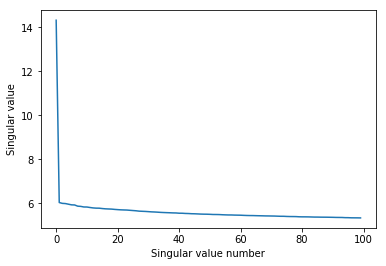

In [39]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [40]:
words_compressed, _, docs_compressed = svds(svd_matrix, k=20)
docs_compressed = docs_compressed.transpose()

print(words_compressed.shape)
print(docs_compressed.shape)

(34489, 20)
(1500, 20)


### project docs onto 2-dimensional space

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(verbose=1)
print(docs_compressed.shape)
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(1500, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.003s...
[t-SNE] Computed neighbors for 1500 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.009836
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.807610
[t-SNE] Error after 1000 iterations: 1.825997
(1500, 2)


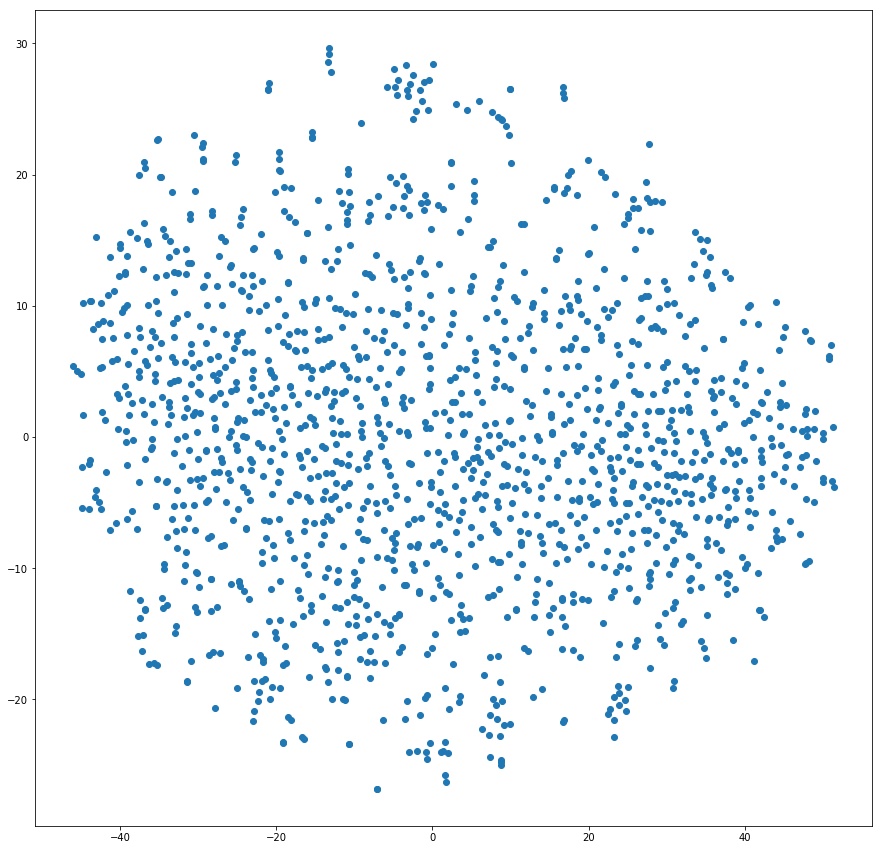

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

## Kmeans clustering

In [186]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [187]:
np.random.seed(42)

In [188]:
from sklearn import preprocessing

In [189]:
normed_data = normalize(train_term_document_matrix_tfidf)

In [190]:
kmeans = KMeans(init='k-means++', n_clusters=15, n_init=10)
kmeans.fit(normed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [191]:
train_labels = kmeans.labels_

In [192]:
train_labels[:50]

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  5,  5,  5,  5,
        5,  1, 12,  5,  5,  5,  5,  5,  5,  5, 10,  5,  4,  2,  5, 10,  5,
        1,  1,  5, 12,  5, 12, 10,  5, 12, 12,  6,  1, 13, 12, 12,  5])

In [193]:
len(train_labels)

1500

In [194]:
test_labels = kmeans.predict(normalize(test_term_document_matrix_tfidf))

In [195]:
test_labels[:100]

array([ 2,  2,  3,  3,  3,  3,  2,  3,  2,  1,  3, 11,  3,  3, 12, 11,  1,
        1,  1, 13, 11, 14, 13,  2, 11, 11,  6, 11, 11,  1,  6,  1,  6,  1,
       11, 11, 13, 12, 11,  6,  6,  6,  1,  2,  4,  6,  2,  1, 13,  4,  2,
        1,  1,  1,  2,  6,  2,  1,  1,  1,  2,  1,  1, 13,  6, 13,  1,  1,
        2,  6,  1,  1,  1,  1, 12,  2,  2,  1,  2,  2,  6,  2,  4, 13,  6,
        1,  6,  1,  1,  1,  6,  4,  1,  2,  1,  1, 12,  6,  6, 12])

In [196]:
len(test_labels)

489

In [197]:
label_DJIA = pd.DataFrame({'train_label': train_labels, 'DJIA_train':DJIA_train})

In [198]:
label_DJIA.head()

,DJIA_train,train_label
0,0,5
1,1,5
2,0,5
3,0,5
4,1,5


In [199]:
label_DJIA.groupby('train_label')['DJIA_train'].count().values/10

array([  5.2,  20.5,  10.5,   7.5,   9.7,   3.7,  11.1,  10.6,   3.9,
         5.7,   5.2,   5. ,  35.8,  13.1,   2.5])

In [202]:
def clustering_plot(label_DJIA, test_labels, n_clusters):    
    plt.figure(figsize =(12,8))
    res = label_DJIA.groupby('train_label')['DJIA_train'].mean()
    s = label_DJIA.groupby('train_label')['DJIA_train'].count().values*2
    plt.plot(res)
    plt.hist(test_labels, normed = 1, bins =np.arange(-0.5,n_clusters-0.5, 1), alpha = 0.5)
    plt.scatter(res.index, res.values, s = s, color = 'r')
    plt.xticks(np.arange(0, n_clusters, step=1))
    plt.axhline(y=0.5, color = 'k')
    plt.axhline(y=0.4, color = 'k', linestyle = 'dashed')
    plt.axhline(y=0.6, color = 'k', linestyle = 'dashed')
    plt.xlabel('Cluster Labels / Histogram of test labels (normed = 1)', size = 15)
    plt.ylabel('Average Within Cluster for training set', size = 15)
    plt.ylim((0,1))
    plt.show()

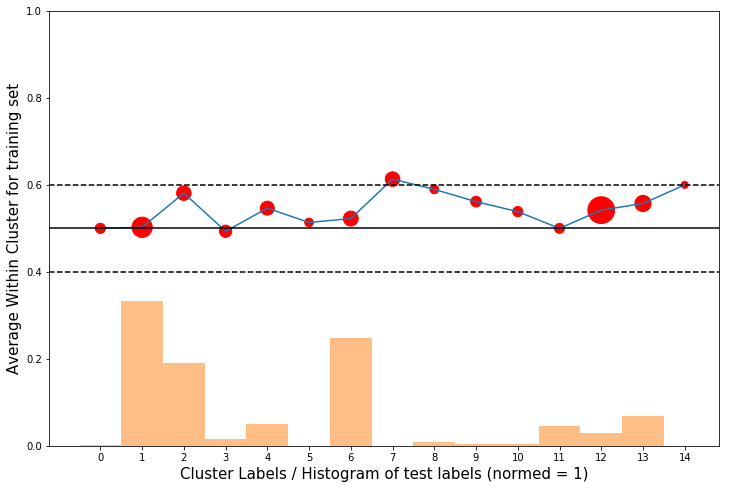

In [203]:
clustering_plot(label_DJIA, test_labels, n_clusters=15)

In [116]:
positive_labels = list(res[res > 0.6].index)

In [118]:
positive_labels

[1, 13, 17]

In [117]:
negative_labels = list(res[res < 0.4].index)

In [119]:
negative_labels

[7, 9, 15]

In [145]:
mean_labels = list(res[np.abs(res-0.5) < 0.05].index)

In [146]:
mean_labels

[0, 2, 5, 8, 10, 11, 12, 14]

In [121]:
test_label_DJIA = pd.DataFrame({'test_label': test_labels, 'DJIA_test':DJIA_test})

In [140]:
test_label_DJIA.test_label.value_counts()

14    159
8     146
18     85
3      31
16     24
19     14
5      10
11      7
12      5
2       3
9       2
1       2
10      1
Name: test_label, dtype: int64

## Kmeans plot

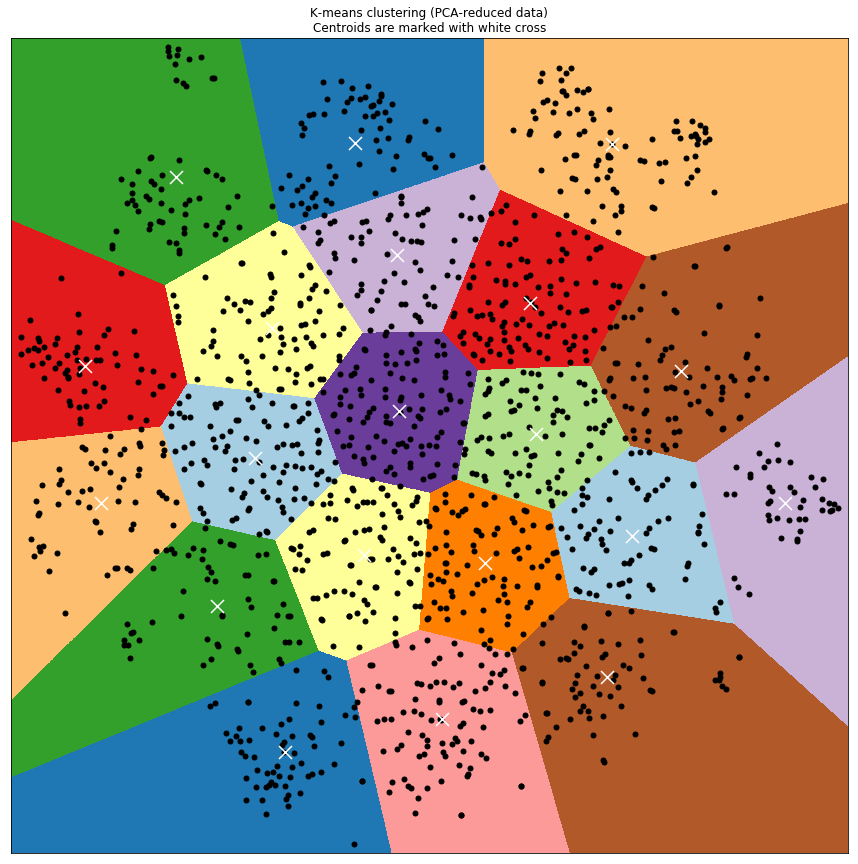

In [57]:
#reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data = projected_docs #2D docs data
kmeans = KMeans(init='k-means++', n_clusters=20, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### KNN

In [204]:
def KNN(X_train, Y_train, X_test, Y_test, K):
    """
    X_train: term_doc_matrix
    Y_train: list
    X_test: term_doc_matrix
    Y_test: list
    K: integer
    """
    pred = np.zeros(len(Y_test), dtype = 'int64')
    inverted_index_test = { i[0]:i[1] for i in list(zip(range(len(Y_test)),Y_test))}
    inverted_index_train= { i[0]:i[1] for i in list(zip(range(len(Y_train)),Y_train))}
    sim_score_matrix_K =  cosine_similarity(X_test, X_train)
    for j in range(sim_score_matrix_K.shape[0]):
        highest_K_score_index = np.argsort(sim_score_matrix_K[j])[-K:]
        DJIA_K = [inverted_index_train[idx] for idx in highest_K_score_index]
        Prob = (sum(DJIA_K)+0.)/len(DJIA_K) #smoothing
        if Prob >= 0.5:
            pred[j] = 1
        else:
            pred[j] = 0
    accu = np.mean(Y_test == pred)
    return accu

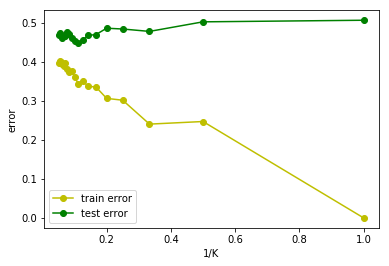

In [19]:
# CountVectorizer
train_error =[1- KNN(train_term_document_matrix_basic, DJIA_train, train_term_document_matrix_basic, DJIA_train, K) for K in range(1, 20)]
test_error = [1- KNN(train_term_document_matrix_basic, DJIA_train, test_term_document_matrix_basic, DJIA_test, K) for K in range(1, 20)]
one_over_k = [1.0/K for K in range(1, 20)]
plt.plot(one_over_k, train_error, '-yo', label = 'train error')
plt.plot(one_over_k, test_error, '-go', label = 'test error')
plt.ylabel('error')
plt.xlabel('1/K')
plt.legend(loc = 'lower left')

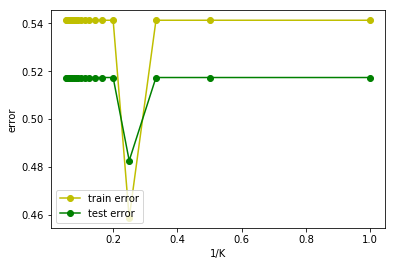

In [205]:
# TfidfVectorizer
train_error =[1- KNN(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train, K) for K in range(1, 20)]
test_error = [1- KNN(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test, K) for K in range(1, 20)]
one_over_k = [1.0/K for K in range(1, 20)]
plt.plot(one_over_k, train_error, '-yo', label = 'train error')
plt.plot(one_over_k, test_error, '-go', label = 'test error')
plt.ylabel('error')
plt.xlabel('1/K')
plt.legend(loc = 'lower left')

In [206]:
KNN(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test, 10)

0.48261758691206547

In [207]:
np.argmin(test_error)

3

In [208]:
KNN(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train, 1)

0.45866666666666667

In [209]:
sum(DJIA_train)/float(len(DJIA_train))

0.54133333333333333

### Logistic

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
#logit = LogisticRegression()
#logit_fit = logit.fit(train_term_document_matrix_basic, DJIA_train)
#logit_predict = logit.predict(test_term_document_matrix_basic)
#accu = sum(DJIA_test == logit_predict)/len(DJIA_test)
#accu

In [212]:
print train_term_document_matrix_tfidf[0]

In [213]:
# LASSO
logit = LogisticRegression(penalty='l1')
logit_fit = logit.fit(train_term_document_matrix_tfidf, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_tfidf)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.51738241308793453

In [214]:
# Ridge
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(train_term_document_matrix_tfidf, DJIA_train)
logit_predict = logit.predict(test_term_document_matrix_tfidf)
accu = sum(DJIA_test == logit_predict)/float(len(DJIA_test))
accu

0.51738241308793453

### Rocchio Classification

In [215]:
def Rocchio(X_train, Y_train, X_test, Y_test):
    """
    X_train: term_doc_matrix
    Y_train: list
    X_test: term_doc_matrix
    Y_test: list
    """
    pred = np.zeros(len(Y_test), dtype = 'int64')
    X_train_1 = X_train[np.array(Y_train) == 1, :]
    X_train_0 = X_train[np.array(Y_train) == 0, :]
    Centriod_1 = (np.sum(X_train_1, axis = 0)+0.)/X_train_1.shape[0]
    Centriod_0 = (np.sum(X_train_0, axis = 0)+0.)/X_train_0.shape[0]
    for j in range(len(Y_test)):
        distance_1 = np.sqrt(np.sum(np.square(X_test[j]-Centriod_1)))
        distance_0 = np.sqrt(np.sum(np.square(X_test[j]-Centriod_0)))
        if distance_1 <= distance_0:
            pred[j] = 1
        else:
            pred[j] = 0
    accu = np.mean(Y_test == pred)
    return accu

In [216]:
# test_accuracy
Rocchio(train_term_document_matrix_tfidf, DJIA_train, test_term_document_matrix_tfidf, DJIA_test)

0.51738241308793453

In [217]:
# train_accuracy
Rocchio(train_term_document_matrix_tfidf, DJIA_train, train_term_document_matrix_tfidf, DJIA_train)

0.54133333333333333

### Naive Bayes

In [218]:
from sklearn.naive_bayes import BernoulliNB

In [219]:
BNBclassifier = BernoulliNB(alpha=1)
BNBclassifier.fit(train_term_document_matrix_tfidf, DJIA_train)

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [220]:
BNBpred = BNBclassifier.predict(test_term_document_matrix_tfidf)
np.mean(BNBpred==DJIA_test)

0.51738241308793453

### Evaluation

In [35]:
BNBclassifier.classes_

array([0, 1], dtype=int64)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(confusion_matrix(DJIA_test, BNBpred))

[[115 121]
 [ 97 156]]


In [39]:
print(classification_report(DJIA_test, BNBpred))

             precision    recall  f1-score   support

          0       0.54      0.49      0.51       236
          1       0.56      0.62      0.59       253

avg / total       0.55      0.55      0.55       489



In [40]:
down_probs=BNBclassifier.feature_log_prob_[0,:]

up_probs=BNBclassifier.feature_log_prob_[1,:]

In [41]:
logodds=down_probs-up_probs

In [42]:
terms = tfidfvectorizer.get_feature_names()

In [43]:
print("\nFeatures that are most indicative of DJIA_UP:\n")
for i in np.argsort(logodds)[:10]:
    print(terms[i])
    
print("\n\nFeatures that are most indicative of DJIA_DOWN\n")
for i in np.argsort(-logodds)[:10]:
    print(terms[i])


Features that are most indicative of DJIA_UP:

lack of
in britain
in east
embassy in
time in
woman who
government has
and other
he has
what the


Features that are most indicative of DJIA_DOWN

said the
sexual abuse
phone hacking
children in
fire on
the german
if it
not only
the former
the ground


### Empath Tool Text Analysis

In [67]:
lexicon = Empath()

In [68]:
df.iloc[1,1]

"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"

In [69]:
lexicon.analyze(df.iloc[1,1], normalize=True)

{'achievement': 0.0,
 'affection': 0.0,
 'aggression': 0.0,
 'air_travel': 0.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 0.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 0.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 0.05,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.0,
 'dance': 0.0,
 'death': 0.0,
 'deception': 0.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 0.0,
 'divine': 0.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 0.0,
 'economics': 0.0,
 'emotional': 0.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0

In [70]:
df.iloc[2,2]

'b"Russia \'ends Georgia operation\'"'

In [71]:
lexicon.analyze(df.iloc[2,2], normalize=True)

{'achievement': 0.0,
 'affection': 0.0,
 'aggression': 0.0,
 'air_travel': 0.0,
 'alcohol': 0.0,
 'ancient': 0.0,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.0,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0,
 'business': 0.0,
 'car': 0.0,
 'celebration': 0.0,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0,
 'clothing': 0.0,
 'cold': 0.0,
 'college': 0.0,
 'communication': 0.0,
 'competing': 0.0,
 'computer': 0.0,
 'confusion': 0.0,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.0,
 'dance': 0.0,
 'death': 0.0,
 'deception': 0.0,
 'disappointment': 0.0,
 'disgust': 0.0,
 'dispute': 0.0,
 'divine': 0.0,
 'domestic_work': 0.0,
 'dominant_heirarchical': 0.0,
 'dominant_personality': 0.0,
 'driving': 0.0,
 'eating': 0.0,
 'economics': 0.0,
 'emotional': 0.0,
 'envy': 0.0,
 'exasperation': 0.0,
 'exercise': 0.0,
 'exotic': 0.0,

In [72]:
def empath_analyze(doc):
    print (doc)
    result = lexicon.analyze(doc, normalize=True)
    for term, score in result.items():
        if score != 0.:
            print ((term, score))

In [73]:
lexicon.analyze('hit', normalize=True).keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

In [74]:
categories = list(lexicon.analyze('no', normalize=True).keys())

In [75]:
empath_df = pd.DataFrame()

In [76]:
df.iloc[22, 1:]

Top1     b'Dutch to ban burkas when picking children up...
Top2     b"For 21 years a British man has refused to bu...
Top3       b'War Nerd - Ossetia: all over but the whining'
Top4     b'North Korean Leader Kim Jong-il is Confirmed...
Top5            b'Polish PM Wants Child Abusers Castrated'
Top6                  b'Russian bombers land in Venezuela'
Top7            b'Devastating Landslide Kills 56 in China'
Top8     b'Iran demands UN investigate Israeli "threats...
Top9     b'2 Israeli Human Right Groups: Israel is forc...
Top10    b'125,000 Gorillas Find Haven in Mud Swamp But...
Top11    b'Moroccan blogger insults King, King jails in...
Top12    b'Ralph Peters, the retired US army colonel wh...
Top13                   b"US 'not winning' in Afghanistan"
Top14    b'Earth Policy Institute: Increasing Equality ...
Top15                 b"Israel 'dividing up Palestinians'"
Top16    b'Iran Being Supported by Shell Oil, OMV and M...
Top17    b'Russia sends warplanes on Venezuela training.

In [77]:
def create_empath_df(headlines, lexicon, length, categories):
    """
    df: pd.DataFrame, original headline dataframe
    lexicon: empath object, empath tool
    length: integer, length of the dataframe
    categories: list, list of categories in lexicon
    """
    
    #df_empath = pd.DataFrame(0, index=df.index[:length], columns=categories)
    row_list = []
    for i in range(length):
        row_list.append(lexicon.analyze(headlines[i], normalize=True))
    df_empath = pd.DataFrame(row_list, index=df.index[:length])
    return df_empath

In [78]:
df_empath = create_empath_df(headlines, lexicon, len(headlines), categories)

In [79]:
df_empath.head()

,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,anticipation,...,wealthy,weapon,weather,wedding,white_collar_job,work,worship,writing,youth,zest
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0.002674,0.0,0.002674,0.000000,0.000000,0.002674,0.000000,0.000000,0.0,0.000000,...,0.000000,0.010695,0.000000,0.002674,0.000000,0.002674,0.000000,0.0,0.000000,0.002674
2008-08-11,0.000000,0.0,0.007326,0.003663,0.003663,0.000000,0.003663,0.000000,0.0,0.000000,...,0.000000,0.003663,0.000000,0.003663,0.000000,0.007326,0.000000,0.0,0.003663,0.000000
2008-08-12,0.000000,0.0,0.005698,0.000000,0.000000,0.005698,0.000000,0.000000,0.0,0.000000,...,0.002849,0.002849,0.000000,0.005698,0.000000,0.002849,0.002849,0.0,0.000000,0.000000
2008-08-13,0.000000,0.0,0.006369,0.000000,0.000000,0.003185,0.000000,0.000000,0.0,0.003185,...,0.000000,0.012739,0.006369,0.003185,0.000000,0.006369,0.000000,0.0,0.000000,0.000000
2008-08-14,0.007194,0.0,0.003597,0.000000,0.003597,0.000000,0.000000,0.003597,0.0,0.000000,...,0.000000,0.007194,0.000000,0.003597,0.003597,0.000000,0.000000,0.0,0.003597,0.000000


In [80]:
df_empath.shape

(1989, 194)

In [86]:
df_empath.sum(axis=0).sort_values(ascending = False)

government               18.334742
war                      18.295696
crime                    17.805880
negative_emotion         15.593990
law                      14.581313
leader                   13.672307
fight                    12.854356
business                 11.580704
kill                     11.559420
stealing                 11.327771
money                    10.438415
weapon                   10.127006
military                 10.042624
violence                  9.919046
death                     9.818250
dispute                   9.785117
economics                 9.588079
terrorism                 9.011457
technology                8.622042
prison                    8.507852
aggression                8.277288
banking                   8.274927
power                     8.195709
dominant_heirarchical     8.165138
work                      8.032700
payment                   7.885455
politics                  7.883431
traveling                 6.987825
valuable            

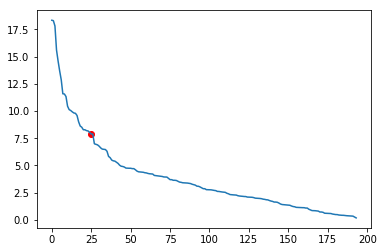

In [92]:
cat_total_scores = df_empath.sum(axis=0).sort_values(ascending = False)
plt.plot(cat_total_scores.values)
plt.scatter(25, cat_total_scores.values[25], color = 'r')

In [99]:
daily_category = df_empath.idxmax(axis=1)

In [106]:
daily_category.value_counts()[:10]

crime               343
government          283
war                 199
negative_emotion    152
business            114
leader               71
law                  67
fight                61
economics            46
money                45
dtype: int64

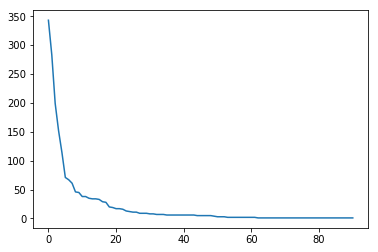

In [104]:
plt.plot(daily_category.value_counts().values)

In [170]:
from collections import defaultdict
cat_to_color = defaultdict(lambda: 'k')

In [171]:
cat_to_color.update({daily_category.value_counts().index[10+i] : 'C'+str(i+1) for i in range(3)})

In [172]:
cat_to_color

defaultdict(<function __main__.<lambda>>,
            {'banking': 'C2', 'dispute': 'C1', 'military': 'C3'})

In [173]:
projected_docs.shape[0]

1500

In [174]:
daily_category.shape

(1989,)

In [175]:
color_to_project = defaultdict(list)
for i in range(projected_docs.shape[0]):
    color_to_project[cat_to_color[daily_category[i]]].append(i)

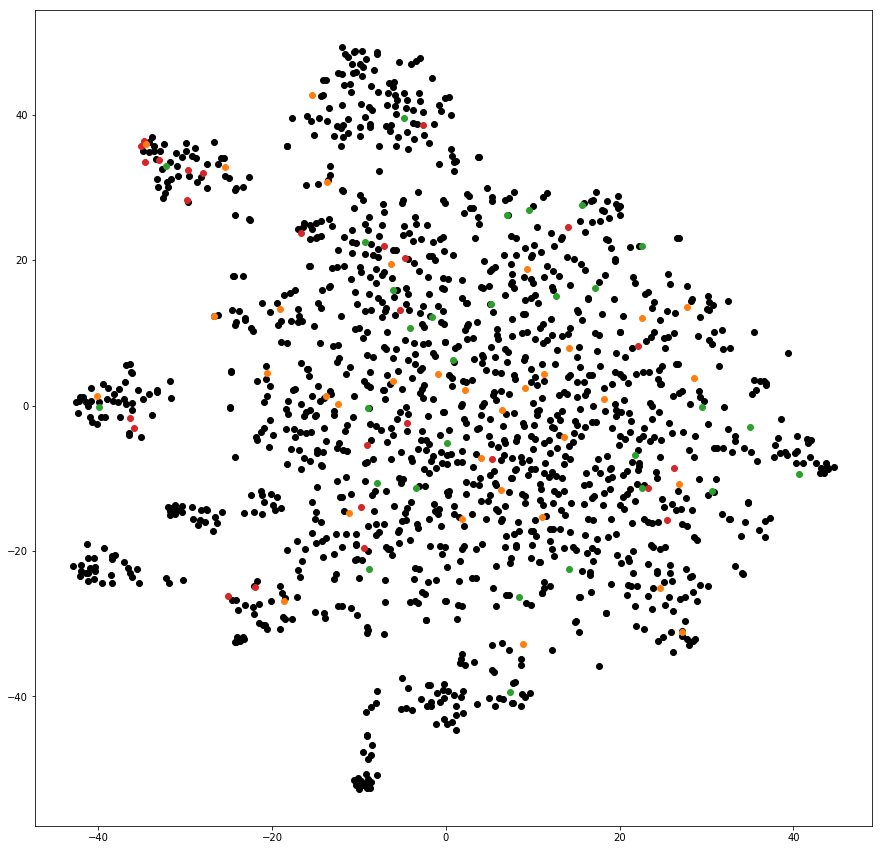

In [176]:
plt.figure(figsize=(15,15))
for color, indices in color_to_project.items():
    indices = np.array(indices)
    plt.scatter(projected_docs[indices,0], projected_docs[indices,1],
                color = color)
plt.show()

### ML using empath matrix

In [115]:
train_empath_matrix = df_empath[:1500].as_matrix(columns = df_empath.columns)
test_empath_matrix = df_empath[1500:].as_matrix(columns = df_empath.columns)

In [132]:
KNN(train_empath_matrix, DJIA_train, test_empath_matrix, DJIA_test, 15)

0.53987730061349692

In [124]:
Rocchio(train_empath_matrix, DJIA_train, test_empath_matrix, DJIA_test)

0.50920245398773001

In [129]:
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(train_empath_matrix, DJIA_train)
logit_predict = logit.predict(test_empath_matrix)
accu = sum(DJIA_test == logit_predict)/len(DJIA_test)
accu

0.51738241308793453

In [130]:
BNBclassifier.fit(train_empath_matrix, DJIA_train)
BNBpred = BNBclassifier.predict(test_empath_matrix)
np.mean(BNBpred==DJIA_test)

0.49693251533742333

### LDA topic classification

In [200]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
cv = CountVectorizer(stop_words = 'english', max_df=.7, min_df=50,
                     max_features=6000)
counts = cv.fit_transform(headlines)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [201]:
n_topic = 15
print(counts.shape)
model = LDA(n_topics=n_topic, max_iter=10, n_jobs=4, verbose=1)
res = model.fit_transform(counts)

(1989, 2135)


D:\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [202]:
feature_names = cv.get_feature_names()
print_top_words(model, feature_names, 20)

Topic #0:
gaza israel israeli says uk government children killed school years people 000 war crisis soldiers palestinian new hamas video attack
Topic #1:
wikileaks assange protesters egypt protests police libya julian government egyptian gaddafi mubarak protest video cables libyan people square bahrain thousands
Topic #2:
nsa snowden whistleblower surveillance edward fukushima russia intelligence rights new war spanish world says human people mission obama dies asylum
Topic #3:
people china police years president uk year 000 world news court government war says chinese minister israel killed country man
Topic #4:
israel police gaza year uk says attack war afghanistan world state hamas million know military like president israeli taliban people
Topic #5:
israel gaza israeli war hamas iran palestinian nuclear palestinians afghanistan earthquake pakistan jewish killed video soldiers west troops aid civilians
Topic #6:
90 afghan civilians afghanistan film trial israel backs attack children

In [203]:
res.shape

(1989, 15)

In [210]:
KNN(X_train=res[:1500, :], Y_train=DJIA_train, X_test=res[1500:, :], Y_test=DJIA_test, K=4)

0.50715746421267893

In [211]:
Rocchio(X_train=res[:1500, :], Y_train=DJIA_train, X_test=res[1500:, :], Y_test=DJIA_test)

0.46216768916155421

In [213]:
BNBclassifier.fit(res[:1500, :], DJIA_train)
BNBpred = BNBclassifier.predict(res[1500:, :])
np.mean(BNBpred==DJIA_test)

0.51738241308793453

In [217]:
logit = LogisticRegression(penalty='l2')
logit_fit = logit.fit(res[:1500, :], DJIA_train)
logit_predict = logit.predict(res[1500: , :])
accu = np.mean(DJIA_test == logit_predict)
accu

0.53578732106339466